In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import (
    datetime as DateTime, 
    timedelta as TimeDelta)

import sys
sys.path.append("../scripts/")

from make_train_test_set import make_train_test_set
from import_data import import_data
from metrics import metrics 
from group_by_clients import group_by_clients

# Random Forest sur les données brutes

In [2]:
df_global = import_data()
clients = group_by_clients(df_global)
n = len(clients)

In [3]:
# Préparation des données de train / test
X_train, X_test, y_train, y_test, test_data = make_train_test_set(clients, ["jour", "forecasted_consumption"], ["real_consumption"])

In [4]:
# création des modèles

rfs = [RandomForestRegressor() for _ in range(n)]

for i, rf in enumerate(rfs) : 
    rf.fit(X_train[i], np.array(y_train[i]).ravel())

In [5]:
y_pred = []
for i, rf in enumerate(rfs): 
    y_pred.append(rf.predict(X_test[i]))

### Evaluation du random forest

In [6]:
evaluation_model = []
evalutation_airliquide_model = []
for i in range(n): 
    evaluation_model.append(metrics(test_data[i]["real_consumption"], y_pred[i]))
    evalutation_airliquide_model.append(metrics(test_data[i]["real_consumption"], test_data[i]["prediction"]))

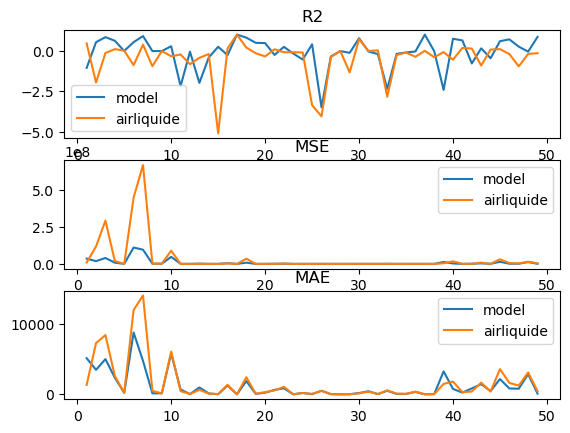

In [7]:
X = list(range(1,n+1))
fig, ax = plt.subplots(3)
ax[0].set_title("R2")
ax[1].set_title("MSE")
ax[2].set_title("MAE")
for i in range(3): 
    ax[i].plot(X, [x[i] for x in evaluation_model], label = "model")
    ax[i].plot(X, [x[i] for x in evalutation_airliquide_model], label = "airliquide")
    ax[i].legend()

# Random Forest avec les données du gaz naturel

In [8]:
gas = pd.read_csv("../data/gas.csv")
gas["horodate"] = pd.to_datetime(gas["horodate"])
gas["horodate"] = gas["horodate"] + pd.Timedelta(days = 14)
gas = gas[(gas["horodate"] <= pd.to_datetime("2023-01-31")) & (gas["horodate"] >= pd.to_datetime("2021-01-01"))]

In [9]:
df_gas = df_global.copy()
df_gas = pd.merge(df_gas, gas, on = ["horodate"], how = "left").sort_values(["id_client", "horodate"]).dropna().reset_index().drop("index", axis = 1)

In [10]:
# on sépare à nouveau en client 
clients_gas = group_by_clients(df_gas)

In [11]:
X_train_gas, X_test_gas, y_train_gas, y_test_gas, test_data_gas = make_train_test_set(clients_gas, ["jour", "forecasted_consumption", "Gas Price"], ["real_consumption"])

In [12]:
# création des modèles : 
models_gas = [RandomForestRegressor() for _ in range(n)]
for i, model in enumerate(models_gas): 
    model.fit(X_train_gas[i], np.array(y_train_gas[i]).ravel())

In [13]:
y_pred_gas = []
for i, model in enumerate(models_gas) : 
    y_pred_gas.append(model.predict(X_test_gas[i]).reshape(len(X_test_gas[i])))

In [14]:
evaluation_model_gas = []
for i in range(n): 
    evaluation_model_gas.append(metrics(test_data_gas[i]["real_consumption"], y_pred_gas[i]))

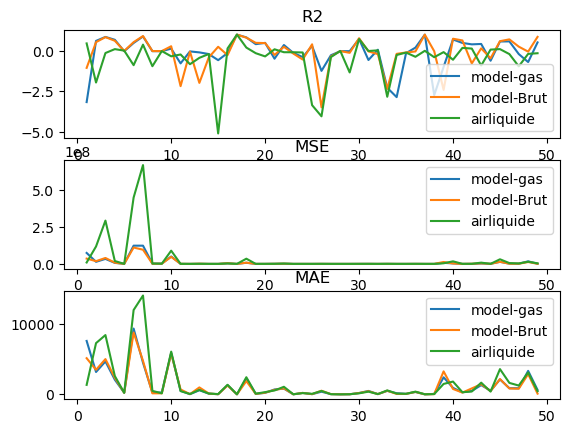

In [15]:
X = list(range(1,n+1))
fig, ax = plt.subplots(3)
ax[0].set_title("R2")
ax[1].set_title("MSE")
ax[2].set_title("MAE")
for i in range(3): 
    ax[i].plot(X, [x[i] for x in evaluation_model_gas], label = "model-gas")
    ax[i].plot(X, [x[i] for x in evaluation_model], label = "model-Brut")
    ax[i].plot(X, [x[i] for x in evalutation_airliquide_model], label = "airliquide")
    ax[i].legend()

# SVM sur les données brutes

In [16]:
df_global = import_data()
clients = group_by_clients(df_global)
n = len(clients)

In [18]:
# Préparation des données de train / test
X_train, X_test, y_train, y_test, test_data = make_train_test_set(clients, ["jour", "forecasted_consumption"], ["real_consumption"])

In [ ]:
# création des modèles
models = [SVR(kernel='linear', C = 0.1, epsilon = 0.5) for _ in range(n)]
for i, model in enumerate(models): 
    model.fit(X_train[i], np.array(y_train[i]).ravel())
    print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
y_pred = []
for i, model in enumerate(models): 
    y_pred.append(model.predict(X_test[i]))

In [ ]:
mod = SVR(kernel = "linear")

In [22]:
mod.fit(X_train[0], np.array(y_train[0]).ravel())

SVR(kernel='linear')

In [23]:
mod.predict(X_test[0])

array([8582.30953229, 8583.19076288, 8584.07199324, 8584.95322371,
       8585.8344543 , 8586.71568478, 8587.59691525, 8588.47814572,
       8589.3593762 , 8590.24060679, 8591.12183714, 8592.00306762,
       8592.88429821, 8593.76552856, 8594.64675904, 8595.52798963,
       8596.4092201 , 8597.29045046, 8598.17168105, 8599.05291153,
       8599.934142  , 8600.81537223, 1031.67830357, 1032.55953404,
       1033.44076451, 1034.32199498, 1035.20322545, 1036.08445592,
       1036.96568639, 1037.84691686, 1038.72814733, 1039.6093778 ,
       1040.49060827, 1041.37183874, 1042.25306921, 1043.13429968,
       1044.01553015, 1044.89676062, 1045.77799109, 1046.65922156,
       1047.54045203, 1048.4216825 , 1049.30291297, 1050.18414344,
       1051.06537391, 1051.94660439, 1052.82783485, 1053.70906533,
       1054.5902958 , 1055.47152627, 1056.35275674, 1057.23398721,
       1058.11521768, 1058.99644815, 1059.87767862, 1060.75890909,
       1061.64013956, 1062.52137003, 1063.4026005 , 1064.28383